# Exercise: Visas over time

#### Summary

Find out how visas issued by the US have changed over time.

#### Data Source(s)

Nonimmigrant Visa Issuances by Visa Class and by Nationality, 1999+, https://travel.state.gov/content/visas/en/law-and-policy/statistics/non-immigrant-visas.html

#### Files

- FYs97-16_NIVDetailTable.xls, "Nonimmigrant Visa Issuances by Visa Class and by Nationality, 1999+"

#### Skills

- Excel files with multiple sheets
- Combining multiple dataframes
- Filling in null values (filling down)
- Dropping and filtering rows
- Renaming columns
- Looping to clean a sheet
- Customizing matplotlib graphs

# Read in FYs97-16_NIVDetailTable.xls, but only the 1999 data

In [140]:
%matplotlib inline
import pandas as pd

In [141]:
df = pd.read_excel("FYs97-16_NIVDetailTable.xls", sheetname='FY99')

## Look at the first couple rows to confirm it's the 1999 data

Don't worry that it's missing a lot of data yet.

In [142]:
df.head(5)

Fiscal Year 1999   A-1    A-2  A-3     B-1   B-1,2     B-2  B-1,2/BCC  \
0           Africa   NaN    NaN  NaN     NaN     NaN     NaN        NaN   
1          Algeria  32.0   35.0  7.0  1433.0  1506.0  2601.0        0.0   
2           Angola  53.0   83.0  3.0     1.0  1888.0   272.0        0.0   
3            Benin  50.0  104.0  6.0    44.0   744.0   132.0        0.0   
4         Botswana   9.0   82.0  0.0     5.0   298.0   327.0        0.0   

   B-1,2/BCV   C-1  C-1/D  C-2  C-3     D  D-CREW  E-1  E-2  E-3  E-3D  E-3R  \
0        NaN   NaN    NaN  NaN  NaN   NaN     NaN  NaN  NaN  NaN   NaN   NaN   
1        0.0  49.0    3.0  0.0  2.0  29.0     0.0  0.0  0.0  0.0   0.0   0.0   
2        0.0  10.0    0.0  0.0  1.0   6.0     0.0  0.0  0.0  0.0   0.0   0.0   
3        0.0  25.0    0.0  0.0  8.0  12.0     0.0  0.0  0.0  0.0   0.0   0.0   
4        0.0  10.0    1.0  1.0  9.0   1.0     0.0  0.0  0.0  0.0   0.0   0.0   

     F-1   F-2  F-3   G-1    G-2  G-3    G-4  G-5  H-1A  H-1B  H-1B1  H-1C  \
0    NaN   NaN  NaN   NaN    NaN  NaN    NaN  NaN   NaN   NaN    NaN   NaN   
1  161.0   5.0  0.0  46.0  115.0  0.0  147.0  4.0   0.0  53.0    0.0   0.0   
2  273.0  14.0  0.0  20.0   59.0  0.0   20.0  0.0   0.0   2.0    0.0   0.0   
3   81.0   9.0  0.0  50.0   18.0  0.0   57.0  6.0   0.0   5.0    0.0   0.0   
4  180.0  22.0  0.0   9.0   18.0  0.0   16.0  1.0   0.0   5.0    0.0   0.0   

   H-2A  H-2B  H-2R  H-3   H-4     I    J-1   J-2   K-1  K-2  K-3  K-4   L-1  \
0   NaN   NaN   NaN  NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN  NaN   NaN   
1   0.0   0.0   0.0  1.0  33.0  28.0   88.0  21.0  20.0  0.0  0.0  0.0   8.0   
2   0.0   0.0   0.0  7.0   1.0   4.0   39.0  26.0   1.0  0.0  0.0  0.0  20.0   
3   0.0   0.0   0.0  0.0   2.0   0.0   60.0   2.0   3.0  0.0  0.0  0.0   0.0   
4   0.0   0.0   0.0  0.0   2.0   0.0  119.0   6.0   0.0  0.0  0.0  0.0   0.0   

    L-2  M-1  M-2  M-3  NATO-1  NATO-2  NATO-3  NATO-4  NATO-5  NATO-6  \
0   NaN  NaN  NaN  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1   9.0  9.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2  31.0  3.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3   0.0  0.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4   0.0  3.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   NATO-7  N-8  N-9  O-1  O-2  O-3  P-1  P-2   P-3  P-4   Q-1  Q-2  Q-3  R-1  \
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN   
1     0.0  0.0  0.0  2.0  0.0  0.0  2.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  4.0   
3     0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  11.0  0.0   0.0  0.0  0.0  2.0   
4     0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   1.0  0.0  26.0  0.0  0.0  0.0   

   R-2  S-5  S-6  S-7   TN   TD  T-1  T-2  T-3  T-4  T-5  U-1  U-2  U-3  U-4  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   V-1  V-2  V-3  Total Visas  BCC  Grand Total  
0  NaN  NaN  NaN          NaN  NaN          NaN  
1  0.0  0.0  0.0       6454.0  0.0       6454.0  
2  0.0  0.0  0.0       2843.0  0.0       2843.0  
3  0.0  0.0  0.0       1433.0  0.0       1433.0  
4  0.0  0.0  0.0       1153.0  0.0       1153.0

In [143]:
#replace NAs and fill in it with the value above 
#df['diff'].fillna(method='ffill') #will copy down values like in excel, useful when you have headerrows 

In [144]:
#df[df['Grand Total'].isnull()]

In [145]:
#df.loc[df.HighQ > 300, 'feelings'] = 'expensive'

#give me everywhere HighQ > 300
# And we are gping to update a column named diff

In [146]:
#df.loc[df.HighQ > 300, 'diff'] = df.HighQ - df.MedQ

In [147]:
#new_df = df[df.feelings.notnull()] #

In [148]:
#dropna
#inplace = True if I wanted to permanently delete them
#new_df = df.dropna(subset=['feelings'])

## Confirm that you have 90 columns and 217 rows

In [149]:
df.shape

(217, 90)

## List all of the columns and their datatype

You'll need to change a pandas display option to make sure you can see all of them. **Make sure there is not a `...` in the middle**.

In [150]:
pd.set_option('max_rows', 217) #only when changing default

In [151]:
df.dtypes.head()

Fiscal Year 1999     object
A-1                 float64
A-2                 float64
A-3                 float64
B-1                 float64
dtype: object

## Rename the "Fiscal Year 1999" row to be "Country"

In [152]:
df.rename(columns={'Fiscal Year 1999': 'Country'}, inplace=True)

## Look at the first 2 rows to make sure you renamed it correctly

In [153]:
# no, not correct! Continents inside
df.head(2)

Country   A-1   A-2  A-3     B-1   B-1,2     B-2  B-1,2/BCC  B-1,2/BCV  \
0   Africa   NaN   NaN  NaN     NaN     NaN     NaN        NaN        NaN   
1  Algeria  32.0  35.0  7.0  1433.0  1506.0  2601.0        0.0        0.0   

    C-1  C-1/D  C-2  C-3     D  D-CREW  E-1  E-2  E-3  E-3D  E-3R    F-1  F-2  \
0   NaN    NaN  NaN  NaN   NaN     NaN  NaN  NaN  NaN   NaN   NaN    NaN  NaN   
1  49.0    3.0  0.0  2.0  29.0     0.0  0.0  0.0  0.0   0.0   0.0  161.0  5.0   

   F-3   G-1    G-2  G-3    G-4  G-5  H-1A  H-1B  H-1B1  H-1C  H-2A  H-2B  \
0  NaN   NaN    NaN  NaN    NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   
1  0.0  46.0  115.0  0.0  147.0  4.0   0.0  53.0    0.0   0.0   0.0   0.0   

   H-2R  H-3   H-4     I   J-1   J-2   K-1  K-2  K-3  K-4  L-1  L-2  M-1  M-2  \
0   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1   0.0  1.0  33.0  28.0  88.0  21.0  20.0  0.0  0.0  0.0  8.0  9.0  9.0  0.0   

   M-3  NATO-1  NATO-2  NATO-3  NATO-4  NATO-5  NATO-6  NATO-7  N-8  N-9  O-1  \
0  NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN  NaN  NaN   
1  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.0  0.0  2.0   

   O-2  O-3  P-1  P-2  P-3  P-4  Q-1  Q-2  Q-3  R-1  R-2  S-5  S-6  S-7   TN  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  2.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    TD  T-1  T-2  T-3  T-4  T-5  U-1  U-2  U-3  U-4  V-1  V-2  V-3  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   Total Visas  BCC  Grand Total  
0          NaN  NaN          NaN  
1       6454.0  0.0       6454.0

In [154]:
df.head(5)

Country   A-1    A-2  A-3     B-1   B-1,2     B-2  B-1,2/BCC  B-1,2/BCV  \
0    Africa   NaN    NaN  NaN     NaN     NaN     NaN        NaN        NaN   
1   Algeria  32.0   35.0  7.0  1433.0  1506.0  2601.0        0.0        0.0   
2    Angola  53.0   83.0  3.0     1.0  1888.0   272.0        0.0        0.0   
3     Benin  50.0  104.0  6.0    44.0   744.0   132.0        0.0        0.0   
4  Botswana   9.0   82.0  0.0     5.0   298.0   327.0        0.0        0.0   

    C-1  C-1/D  C-2  C-3     D  D-CREW  E-1  E-2  E-3  E-3D  E-3R    F-1  \
0   NaN    NaN  NaN  NaN   NaN     NaN  NaN  NaN  NaN   NaN   NaN    NaN   
1  49.0    3.0  0.0  2.0  29.0     0.0  0.0  0.0  0.0   0.0   0.0  161.0   
2  10.0    0.0  0.0  1.0   6.0     0.0  0.0  0.0  0.0   0.0   0.0  273.0   
3  25.0    0.0  0.0  8.0  12.0     0.0  0.0  0.0  0.0   0.0   0.0   81.0   
4  10.0    1.0  1.0  9.0   1.0     0.0  0.0  0.0  0.0   0.0   0.0  180.0   

    F-2  F-3   G-1    G-2  G-3    G-4  G-5  H-1A  H-1B  H-1B1  H-1C  H-2A  \
0   NaN  NaN   NaN    NaN  NaN    NaN  NaN   NaN   NaN    NaN   NaN   NaN   
1   5.0  0.0  46.0  115.0  0.0  147.0  4.0   0.0  53.0    0.0   0.0   0.0   
2  14.0  0.0  20.0   59.0  0.0   20.0  0.0   0.0   2.0    0.0   0.0   0.0   
3   9.0  0.0  50.0   18.0  0.0   57.0  6.0   0.0   5.0    0.0   0.0   0.0   
4  22.0  0.0   9.0   18.0  0.0   16.0  1.0   0.0   5.0    0.0   0.0   0.0   

   H-2B  H-2R  H-3   H-4     I    J-1   J-2   K-1  K-2  K-3  K-4   L-1   L-2  \
0   NaN   NaN  NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN  NaN   NaN   NaN   
1   0.0   0.0  1.0  33.0  28.0   88.0  21.0  20.0  0.0  0.0  0.0   8.0   9.0   
2   0.0   0.0  7.0   1.0   4.0   39.0  26.0   1.0  0.0  0.0  0.0  20.0  31.0   
3   0.0   0.0  0.0   2.0   0.0   60.0   2.0   3.0  0.0  0.0  0.0   0.0   0.0   
4   0.0   0.0  0.0   2.0   0.0  119.0   6.0   0.0  0.0  0.0  0.0   0.0   0.0   

   M-1  M-2  M-3  NATO-1  NATO-2  NATO-3  NATO-4  NATO-5  NATO-6  NATO-7  N-8  \
0  NaN  NaN  NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN   
1  9.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.0   
2  3.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.0   
3  0.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.0   
4  3.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.0   

   N-9  O-1  O-2  O-3  P-1  P-2   P-3  P-4   Q-1  Q-2  Q-3  R-1  R-2  S-5  \
0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  2.0  0.0  0.0  2.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  4.0  1.0  0.0   
3  0.0  1.0  0.0  0.0  1.0  0.0  11.0  0.0   0.0  0.0  0.0  2.0  0.0  0.0   
4  0.0  1.0  0.0  0.0  1.0  0.0   1.0  0.0  26.0  0.0  0.0  0.0  0.0  0.0   

   S-6  S-7   TN   TD  T-1  T-2  T-3  T-4  T-5  U-1  U-2  U-3  U-4  V-1  V-2  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   V-3  Total Visas  BCC  Grand Total  
0  NaN          NaN  NaN          NaN  
1  0.0       6454.0  0.0       6454.0  
2  0.0       2843.0  0.0       2843.0  
3  0.0       1433.0  0.0       1433.0  
4  0.0       1153.0  0.0       1153.0

# Finding the dirty data

Usually we clean up columns with bad data, but this time **it's the rows that are bad**.

## Look at the first five rows. How can you identify the "bad" row?

There is one near the top and a few near the bottom.

In [155]:
df.head(1) #NaN-Values

Country  A-1  A-2  A-3  B-1  B-1,2  B-2  B-1,2/BCC  B-1,2/BCV  C-1  C-1/D  \
0  Africa  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN    NaN   

   C-2  C-3   D  D-CREW  E-1  E-2  E-3  E-3D  E-3R  F-1  F-2  F-3  G-1  G-2  \
0  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   

   G-3  G-4  G-5  H-1A  H-1B  H-1B1  H-1C  H-2A  H-2B  H-2R  H-3  H-4   I  \
0  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN  NaN NaN   

   J-1  J-2  K-1  K-2  K-3  K-4  L-1  L-2  M-1  M-2  M-3  NATO-1  NATO-2  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN     NaN   

   NATO-3  NATO-4  NATO-5  NATO-6  NATO-7  N-8  N-9  O-1  O-2  O-3  P-1  P-2  \
0     NaN     NaN     NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   P-3  P-4  Q-1  Q-2  Q-3  R-1  R-2  S-5  S-6  S-7  TN  TD  T-1  T-2  T-3  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN  NaN  NaN  NaN   

   T-4  T-5  U-1  U-2  U-3  U-4  V-1  V-2  V-3  Total Visas  BCC  Grand Total  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN          NaN  NaN          NaN

In [156]:
pd.set_option("max_columns", 90)
df.head()

Country   A-1    A-2  A-3     B-1   B-1,2     B-2  B-1,2/BCC  B-1,2/BCV  \
0    Africa   NaN    NaN  NaN     NaN     NaN     NaN        NaN        NaN   
1   Algeria  32.0   35.0  7.0  1433.0  1506.0  2601.0        0.0        0.0   
2    Angola  53.0   83.0  3.0     1.0  1888.0   272.0        0.0        0.0   
3     Benin  50.0  104.0  6.0    44.0   744.0   132.0        0.0        0.0   
4  Botswana   9.0   82.0  0.0     5.0   298.0   327.0        0.0        0.0   

    C-1  C-1/D  C-2  C-3     D  D-CREW  E-1  E-2  E-3  E-3D  E-3R    F-1  \
0   NaN    NaN  NaN  NaN   NaN     NaN  NaN  NaN  NaN   NaN   NaN    NaN   
1  49.0    3.0  0.0  2.0  29.0     0.0  0.0  0.0  0.0   0.0   0.0  161.0   
2  10.0    0.0  0.0  1.0   6.0     0.0  0.0  0.0  0.0   0.0   0.0  273.0   
3  25.0    0.0  0.0  8.0  12.0     0.0  0.0  0.0  0.0   0.0   0.0   81.0   
4  10.0    1.0  1.0  9.0   1.0     0.0  0.0  0.0  0.0   0.0   0.0  180.0   

    F-2  F-3   G-1    G-2  G-3    G-4  G-5  H-1A  H-1B  H-1B1  H-1C  H-2A  \
0   NaN  NaN   NaN    NaN  NaN    NaN  NaN   NaN   NaN    NaN   NaN   NaN   
1   5.0  0.0  46.0  115.0  0.0  147.0  4.0   0.0  53.0    0.0   0.0   0.0   
2  14.0  0.0  20.0   59.0  0.0   20.0  0.0   0.0   2.0    0.0   0.0   0.0   
3   9.0  0.0  50.0   18.0  0.0   57.0  6.0   0.0   5.0    0.0   0.0   0.0   
4  22.0  0.0   9.0   18.0  0.0   16.0  1.0   0.0   5.0    0.0   0.0   0.0   

   H-2B  H-2R  H-3   H-4     I    J-1   J-2   K-1  K-2  K-3  K-4   L-1   L-2  \
0   NaN   NaN  NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN  NaN   NaN   NaN   
1   0.0   0.0  1.0  33.0  28.0   88.0  21.0  20.0  0.0  0.0  0.0   8.0   9.0   
2   0.0   0.0  7.0   1.0   4.0   39.0  26.0   1.0  0.0  0.0  0.0  20.0  31.0   
3   0.0   0.0  0.0   2.0   0.0   60.0   2.0   3.0  0.0  0.0  0.0   0.0   0.0   
4   0.0   0.0  0.0   2.0   0.0  119.0   6.0   0.0  0.0  0.0  0.0   0.0   0.0   

   M-1  M-2  M-3  NATO-1  NATO-2  NATO-3  NATO-4  NATO-5  NATO-6  NATO-7  N-8  \
0  NaN  NaN  NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN   
1  9.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.0   
2  3.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.0   
3  0.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.0   
4  3.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.0   

   N-9  O-1  O-2  O-3  P-1  P-2   P-3  P-4   Q-1  Q-2  Q-3  R-1  R-2  S-5  \
0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  2.0  0.0  0.0  2.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  4.0  1.0  0.0   
3  0.0  1.0  0.0  0.0  1.0  0.0  11.0  0.0   0.0  0.0  0.0  2.0  0.0  0.0   
4  0.0  1.0  0.0  0.0  1.0  0.0   1.0  0.0  26.0  0.0  0.0  0.0  0.0  0.0   

   S-6  S-7   TN   TD  T-1  T-2  T-3  T-4  T-5  U-1  U-2  U-3  U-4  V-1  V-2  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   V-3  Total Visas  BCC  Grand Total  
0  NaN          NaN  NaN          NaN  
1  0.0       6454.0  0.0       6454.0  
2  0.0       2843.0  0.0       2843.0  
3  0.0       1433.0  0.0       1433.0  
4  0.0       1153.0  0.0       1153.0

In [157]:
df.tail(5)  

Country      A-1      A-2     A-3      B-1  \
212                 No Nationality      1.0      4.0     2.0    229.0   
213  United Nations Laissez-Passer      0.0      0.0     0.0      0.0   
214             Totals for Unknown      1.0      4.0     2.0    229.0   
215                            NaN      NaN      NaN     NaN      NaN   
216                   Grand Totals  10757.0  66335.0  2279.0  93019.0   

         B-1,2       B-2  B-1,2/BCC  B-1,2/BCV      C-1     C-1/D   C-2  \
212     4384.0    4899.0        0.0        0.0    186.0    1395.0   0.0   
213        0.0       0.0        0.0        0.0      0.0       0.0   0.0   
214     4384.0    4899.0        0.0        0.0    186.0    1395.0   0.0   
215        NaN       NaN        NaN        NaN      NaN       NaN   NaN   
216  3447822.0  642676.0   676386.0        0.0  26494.0  161723.0  25.0   

        C-3        D   D-CREW     E-1      E-2  E-3  E-3D  E-3R       F-1  \
212     0.0    134.0  10768.0     1.0      8.0  0.0   0.0   0.0     195.0   
213     0.0      0.0      0.0     0.0      0.0  0.0   0.0   0.0       0.0   
214     0.0    134.0  10768.0     1.0      8.0  0.0   0.0   0.0     195.0   
215     NaN      NaN      NaN     NaN      NaN  NaN   NaN   NaN       NaN   
216  7805.0  19175.0  10768.0  9973.0  22975.0  0.0   0.0   0.0  262542.0   

         F-2  F-3     G-1     G-2    G-3      G-4     G-5  H-1A      H-1B  \
212      8.0  0.0     1.0     3.0    0.0      1.0     0.0   0.0      67.0   
213      0.0  0.0     0.0     0.0    0.0    152.0     0.0   0.0       0.0   
214      8.0  0.0     1.0     3.0    0.0    153.0     0.0   0.0      67.0   
215      NaN  NaN     NaN     NaN    NaN      NaN     NaN   NaN       NaN   
216  22893.0  0.0  5090.0  8466.0  165.0  17142.0  1737.0   5.0  116513.0   

     H-1B1  H-1C     H-2A     H-2B  H-2R     H-3      H-4        I       J-1  \
212    0.0   0.0      0.0      4.0   0.0     0.0     38.0      8.0     352.0   
213    0.0   0.0      0.0      0.0   0.0     0.0      0.0      0.0       0.0   
214    0.0   0.0      0.0      4.0   0.0     0.0     38.0      8.0     352.0   
215    NaN   NaN      NaN      NaN   NaN     NaN      NaN      NaN       NaN   
216    0.0   0.0  28568.0  30642.0   0.0  1892.0  69194.0  12694.0  211349.0   

         J-2      K-1     K-2  K-3  K-4      L-1      L-2     M-1    M-2  M-3  \
212     12.0     10.0     3.0  0.0  0.0      5.0      8.0     2.0    0.0  0.0   
213      0.0      0.0     0.0  0.0  0.0      0.0      0.0     0.0    0.0  0.0   
214     12.0     10.0     3.0  0.0  0.0      5.0      8.0     2.0    0.0  0.0   
215      NaN      NaN     NaN  NaN  NaN      NaN      NaN     NaN    NaN  NaN   
216  34394.0  17025.0  2431.0  0.0  0.0  41739.0  46289.0  6240.0  337.0  0.0   

     NATO-1  NATO-2  NATO-3  NATO-4  NATO-5  NATO-6  NATO-7   N-8  N-9  \
212     0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.0  0.0   
213     0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.0  0.0   
214     0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.0  0.0   
215     NaN     NaN     NaN     NaN     NaN     NaN     NaN   NaN  NaN   
216    22.0  4865.0     0.0   211.0    28.0   256.0     6.0  10.0  9.0   

        O-1     O-2     O-3      P-1    P-2     P-3    P-4     Q-1  Q-2  Q-3  \
212     3.0     0.0     0.0      6.0    0.0    13.0    0.0     0.0  0.0  0.0   
213     0.0     0.0     0.0      0.0    0.0     0.0    0.0     0.0  0.0  0.0   
214     3.0     0.0     0.0      6.0    0.0    13.0    0.0     0.0  0.0  0.0   
215     NaN     NaN     NaN      NaN    NaN     NaN    NaN     NaN  NaN  NaN   
216  5009.0  2185.0  1480.0  22306.0  198.0  8068.0  742.0  1836.0  0.0  0.0   

        R-1     R-2  S-5  S-6  S-7     TN     TD  T-1  T-2  T-3  T-4  T-5  \
212    98.0     0.0  0.0  0.0  0.0    0.0    3.0  0.0  0.0  0.0  0.0  0.0   
213     0.0     0.0  0.0  0.0  0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   
214    98.0     0.0  0.0  0.0  0.0    0.0    3.0  0.0  0.0  0.0  0.0  0.0   
215     N

## Find all of the "bad" rows based on what you decided was unique about the "bad" row

You should get **14 rows and 90 columns**.

In [158]:
df[df['A-1'].isnull()]

Country  A-1  A-2  A-3  B-1  B-1,2  B-2  B-1,2/BCC  B-1,2/BCV  C-1  \
0           Africa  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
55             NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
56            Asia  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
97             NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
98          Europe  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
153            NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
154  North America  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
178            NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
179        Oceania  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
195            NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
196  South America  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
210            NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
211        Unknown  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
215            NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   

     C-1/D  C-2  C-3   D  D-CREW  E-1  E-2  E-3  E-3D  E-3R  F-1  F-2  F-3  \
0      NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
55     NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
56     NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
97     NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
98     NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
153    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
154    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
178    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
179    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
195    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
196    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
210    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
211    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
215    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   

     G-1  G-2  G-3  G-4  G-5  H-1A  H-1B  H-1B1  H-1C  H-2A  H-2B  H-2R  H-3  \
0    NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
55   NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
56   NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
97   NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
98   NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
153  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
154  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
178  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
179  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
195  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
196  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
210  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
211  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
215  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   

     H-4   I  J-1  J-2  K-1  K-2  K-3  K-4  L-1  L-2  M-1  M-2  M-3  NATO-1  \
0    NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN   
55   NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN   
56   NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN   
97   NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN   
98   NaN NaN  NaN  NaN  NaN 

## Is there a column for continent? How do you know what continent a country is in?

It's probably easiest to see this in Excel. Don't edit it in Excel, though!

In [159]:
#We find a continent row above the countries that belong to this country

## Cleaning up the data

We have several types of rows that we don't like:

- Headers for continents ("Africa," "Europe," etc)
- Totals for continents ("Totals for Africa," "Totals for Europe," etc.)
- The empty lines between continent sections

But we *do*! We're going to do a **three step process**:

1. Create a new "continent" column for each of the header rows
2. Copy that value down into all of the columns below it
3. Delete the header/total/space rows

### STEP 1: For each continent header row, add a new column called `continent` with the value of the continent

> If you get the warning `A value is trying to be set on a copy of a slice from a DataFrame`, let's talk about it, because it means your code didn't work!

In [160]:
df.loc[df['A-1'].isnull(), 'continent'] = df['Country']

## STEP 1 CONFIRMATION

Take a look at our data, make sure it looks right!

In [161]:
df[df['A-1'].isnull()]

Country  A-1  A-2  A-3  B-1  B-1,2  B-2  B-1,2/BCC  B-1,2/BCV  C-1  \
0           Africa  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
55             NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
56            Asia  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
97             NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
98          Europe  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
153            NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
154  North America  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
178            NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
179        Oceania  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
195            NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
196  South America  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
210            NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
211        Unknown  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   
215            NaN  NaN  NaN  NaN  NaN    NaN  NaN        NaN        NaN  NaN   

     C-1/D  C-2  C-3   D  D-CREW  E-1  E-2  E-3  E-3D  E-3R  F-1  F-2  F-3  \
0      NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
55     NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
56     NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
97     NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
98     NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
153    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
154    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
178    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
179    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
195    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
196    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
210    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
211    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   
215    NaN  NaN  NaN NaN     NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN   

     G-1  G-2  G-3  G-4  G-5  H-1A  H-1B  H-1B1  H-1C  H-2A  H-2B  H-2R  H-3  \
0    NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
55   NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
56   NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
97   NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
98   NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
153  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
154  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
178  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
179  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
195  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
196  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
210  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
211  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   
215  NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  NaN   

     H-4   I  J-1  J-2  K-1  K-2  K-3  K-4  L-1      ...        M-1  M-2  M-3  \
0    NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...        NaN  NaN  NaN   
55   NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...        NaN  NaN  NaN   
56   NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...        NaN  NaN  NaN   
97   NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...        NaN  NaN  NaN   
98   NaN NaN  NaN 

## STEP 2: Filling down

Use pandas to take that continent value and "copy it down" through the null values. So it might start off looking like this...

|Country|Grand Total|Continent|
|---|---|---|
|Africa|NaN|Africa|
|Algeria|6454.0|NaN|
|Angola|2843.0|NaN|
|Asia|NaN|Asia|
|Afghanistan|2217.0|NaN|
|Bahrain|2502.0|NaN|

and then look like this:

|Country|Grand Total|Continent|
|---|---|---|
|Africa|NaN|Africa|
|Algeria|6454.0|**Africa**|
|Angola|2843.0|**Africa**|
|Asia|NaN|Asia|
|Afghanistan|2217.0|**Asia**|
|Bahrain|2502.0|**Asia**|

## STEP 2 CONFIRMATION

Check how many rows of each continent exist in the dataset. **Europe and Africa should both have 56.**

In [162]:
df['continent'].fillna(method='ffill', inplace=True)
df.continent.value_counts()

Africa           56
Europe           56
Asia             42
North America    25
Oceania          17
South America    15
Unknown           6
Name: continent, dtype: int64

In [163]:
df.head()

Country   A-1    A-2  A-3     B-1   B-1,2     B-2  B-1,2/BCC  B-1,2/BCV  \
0    Africa   NaN    NaN  NaN     NaN     NaN     NaN        NaN        NaN   
1   Algeria  32.0   35.0  7.0  1433.0  1506.0  2601.0        0.0        0.0   
2    Angola  53.0   83.0  3.0     1.0  1888.0   272.0        0.0        0.0   
3     Benin  50.0  104.0  6.0    44.0   744.0   132.0        0.0        0.0   
4  Botswana   9.0   82.0  0.0     5.0   298.0   327.0        0.0        0.0   

    C-1  C-1/D  C-2  C-3     D  D-CREW  E-1  E-2  E-3  E-3D  E-3R    F-1  \
0   NaN    NaN  NaN  NaN   NaN     NaN  NaN  NaN  NaN   NaN   NaN    NaN   
1  49.0    3.0  0.0  2.0  29.0     0.0  0.0  0.0  0.0   0.0   0.0  161.0   
2  10.0    0.0  0.0  1.0   6.0     0.0  0.0  0.0  0.0   0.0   0.0  273.0   
3  25.0    0.0  0.0  8.0  12.0     0.0  0.0  0.0  0.0   0.0   0.0   81.0   
4  10.0    1.0  1.0  9.0   1.0     0.0  0.0  0.0  0.0   0.0   0.0  180.0   

    F-2  F-3   G-1    G-2  G-3    G-4  G-5  H-1A  H-1B  H-1B1  H-1C  H-2A  \
0   NaN  NaN   NaN    NaN  NaN    NaN  NaN   NaN   NaN    NaN   NaN   NaN   
1   5.0  0.0  46.0  115.0  0.0  147.0  4.0   0.0  53.0    0.0   0.0   0.0   
2  14.0  0.0  20.0   59.0  0.0   20.0  0.0   0.0   2.0    0.0   0.0   0.0   
3   9.0  0.0  50.0   18.0  0.0   57.0  6.0   0.0   5.0    0.0   0.0   0.0   
4  22.0  0.0   9.0   18.0  0.0   16.0  1.0   0.0   5.0    0.0   0.0   0.0   

   H-2B  H-2R  H-3   H-4     I    J-1   J-2   K-1  K-2  K-3  K-4   L-1  \
0   NaN   NaN  NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN  NaN   NaN   
1   0.0   0.0  1.0  33.0  28.0   88.0  21.0  20.0  0.0  0.0  0.0   8.0   
2   0.0   0.0  7.0   1.0   4.0   39.0  26.0   1.0  0.0  0.0  0.0  20.0   
3   0.0   0.0  0.0   2.0   0.0   60.0   2.0   3.0  0.0  0.0  0.0   0.0   
4   0.0   0.0  0.0   2.0   0.0  119.0   6.0   0.0  0.0  0.0  0.0   0.0   

     ...      M-1  M-2  M-3  NATO-1  NATO-2  NATO-3  NATO-4  NATO-5  NATO-6  \
0    ...      NaN  NaN  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    ...      9.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2    ...      3.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    ...      0.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    ...      3.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   NATO-7  N-8  N-9  O-1  O-2  O-3  P-1  P-2   P-3  P-4   Q-1  Q-2  Q-3  R-1  \
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN   
1     0.0  0.0  0.0  2.0  0.0  0.0  2.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  4.0   
3     0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  11.0  0.0   0.0  0.0  0.0  2.0   
4     0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   1.0  0.0  26.0  0.0  0.0  0.0   

   R-2  S-5  S-6  S-7   TN   TD  T-1  T-2  T-3  T-4  T-5  U-1  U-2  U-3  U-4  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   V-1  V-2  V-3  Total Visas  BCC  Grand Total  continent  
0  NaN  NaN  NaN          NaN  NaN          NaN     Africa  
1  0.0  0.0  0.0       6454.0  0.0       6454.0     Africa  
2  0.0  0.0  0.0       2843.0  0.0       2843.0     Africa  
3  0.0  0.0  0.0       1433.0  0.0       1433.0     Africa  
4  0.0  0.0  0.0       1153.0  0.0       1153.0     Africa  

[5 rows x 91 columns]

## STEP 3: Deleting the bad rows

### Delete the rows where "Grand Total" is missing

- Tip: There are multiple ways to do this! I can tell you them!

In [164]:
df = df[df['Grand Total'].notnull()]

In [165]:
df = df[~df['Country'].str.contains('Grand Totals')] # ~ is basically "is not" - very last row

### Look at the first 55 rows to be sure it worked

In [166]:
df.head(55)

Country     A-1     A-2    A-3     B-1  \
1                                    Algeria    32.0    35.0    7.0  1433.0   
2                                     Angola    53.0    83.0    3.0     1.0   
3                                      Benin    50.0   104.0    6.0    44.0   
4                                   Botswana     9.0    82.0    0.0     5.0   
5                               Burkina Faso    26.0    13.0    1.0    13.0   
6                                    Burundi    25.0    20.0    1.0    17.0   
7                                   Cameroon    81.0    81.0   12.0   170.0   
8                                 Cape Verde    10.0    17.0    3.0    21.0   
9                   Central African Republic     6.0    21.0    0.0     6.0   
10                                      Chad    17.0    75.0    1.0    37.0   
11                                   Comoros     0.0     1.0    0.0     0.0   
12  Congo, Dem. Rep. of the (Congo Kinshasa)    13.0    33.0    0.0    11.0   
13    Congo, Rep. of the (Congo Brazzaville)    28.0   107.0    2.0    40.0   
14                            Cote d'Ivoire     69.0   144.0    9.0   226.0   
15                                  Djibouti    22.0    33.0    6.0    30.0   
16                                     Egypt   239.0  2592.0   40.0   536.0   
17                         Equatorial Guinea    29.0    23.0    1.0    27.0   
18                                   Eritrea     6.0    36.0   15.0   458.0   
19                                  Ethiopia    15.0    38.0   15.0   812.0   
20                                     Gabon    56.0    52.0    2.0     6.0   
21                               Gambia, The    19.0    82.0    4.0    18.0   
22                                     Ghana    36.0   236.0    6.0   494.0   
23                                    Guinea    30.0    89.0    4.0    50.0   
24                             Guinea-Bissau     3.0    11.0    2.0     2.0   
25                                     Kenya    80.0   156.0   31.0   172.0   
26                                   Lesotho    10.0    15.0    0.0     7.0   
27                                   Liberia    27.0    32.0    1.0   161.0   
28                                     Libya     2.0     0.0    0.0    25.0   
29                                Madagascar    52.0    53.0    8.0   109.0   
30                                    Malawi     8.0    46.0    0.0     4.0   
31                                      Mali    16.0    59.0    0.0   169.0   
32                                Mauritania    25.0    64.0    5.0    34.0   
33                                 Mauritius    14.0    19.0    0.0    14.0   
34                                   Morocco    49.0   350.0   42.0   566.0   
35                                Mozambique    50.0   119.0   20.0     3.0   
36                                   Namibia    35.0    78.0    7.0     0.0   
37                                     Niger    30.0    22.0   10.0   474.0   
38                                   Nigeria   211.0   216.0   12.0   858.0   
39                                    Rwanda    10.0    81.0    5.0    11.0   
40                     Sao Tome and Principe     1.0     4.0    0.0     2.0   
41                                   Senegal    40.0   141.0    8.0   170.0   
42                                Seychelles     0.0     5.0    0.0    10.0   
43                              Sierra Leone     5.0     5.0    0.0    18.0   
44                                   Somalia     0.0     0.0    1.0    34.0   
45                              South Africa   108.0   395.0   16.0   169.0   
46                                     Sudan     1.0    45.0   20.0   681.0   
47                                 Swaziland     9.0    39.0    1.0     0.0   
48                                  Tanzania    42.0   114.0    9.0   439.0   
49                                      Togo    35.0    29.0    5.0    28.0   
50                                   Tunisia    40.0   259.0    6.0    76.0   
51      

### Delete the rows where "Country" has "Totals"

Now that we have the "Continent" column we can calculate totals with a groupby.

- Tip: There are multiple ways to do this, but only one best way to do it! It probably isn't the same as the last question.

In [167]:
df['Country'].str.extract('(Totals for)').value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Totals for    7
Name: Country, dtype: int64

In [168]:
df = df[df['Country'].str.contains('Totals for') == False]

## Confirm your cleanup worked

Check to make sure you have 195 rows and 90 columns

In [169]:
df.shape

(195, 91)

# Making a few graphs

Create a bar graph of the top 10 countries that visas are from

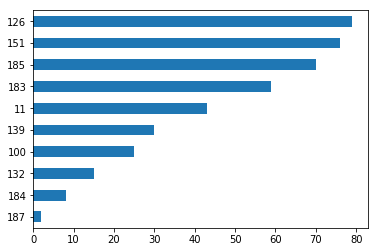

In [170]:
df['Total Visas'].sort_values().head(10).plot(kind='barh', x='Total Visas', y='Country')

## Clean up that graph!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add commas for the number axis

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
```

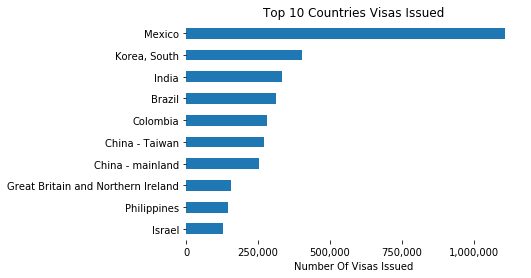

In [171]:
ax = df.sort_values(by='Total Visas', ascending=True).tail(10).plot(kind='barh', x='Country', y='Total Visas')
ax.set_title('Top 10 Countries Visas Issued')
ax.set_xlabel('Number Of Visas Issued')
ax.yaxis.label.set_visible(False)
ax.legend_.remove()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.locator_params(axis='x', nbins=5)

import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

## Create a bar graph of the total number of F-1 visas from each continent

And make it look nice!

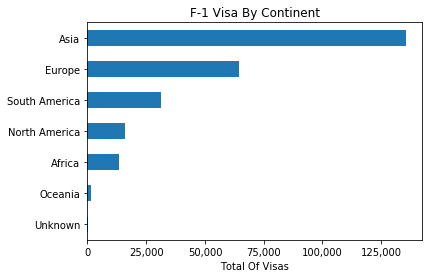

In [172]:
ax = df.groupby('continent')['F-1'].sum().sort_values().plot(kind='barh', x='continent', y='F-1')

ax.set_title('F-1 Visa By Continent')
ax.set_xlabel('Total Of Visas')
ax.yaxis.label.set_visible(False)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.locator_params(axis='x', nbins=6)

# Read in the data from 2000-2016

They should each be in a separate dataframe.

- Tip: Maybe I have quicker ways to do this?

In [173]:
sheetnames = [
    'FY97', 'FY98', 'FY99', 'FY00', 'FY01', 'FY02', 'FY03', 'FY04', 'FY05', 'FY06',
    'FY07', 'FY08', 'FY09', 'FY10', 'FY11', 'FY12', 'FY13', 'FY14', 'FY15', 'FY16'
]

In [174]:
visa_df = [pd.read_excel('FYs97-16_NIVDetailTable.xls', sheetname=name) for name in sheetnames]

In [175]:
visa_df[0]

Fiscal Year 1997      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     62.0     23.0     5.0   
2                                      Angola     54.0    169.0     3.0   
3                                       Benin     10.0     43.0     4.0   
4                                    Botswana     10.0     79.0     1.0   
5                                Burkina Faso     19.0      7.0     1.0   
6                                     Burundi      5.0      2.0     0.0   
7                                    Cameroon     44.0     52.0    11.0   
8                                  Cape Verde      3.0     23.0     2.0   
9                    Central African Republic      7.0      5.0     0.0   
10                                       Chad     24.0     53.0     0.0   
11                                    Comoros      0.0      4.0     0.0   
12   Congo, Dem. Rep. of the (Congo Kinshasa)     36.0     20.0     0.0   
13     Congo, Rep. of the (Congo Brazzaville)     16.0     24.0     2.0   
14                             Cote d'Ivoire      49.0     86.0    16.0   
15                                   Djibouti     16.0     25.0     1.0   
16                                      Egypt    189.0   2012.0    33.0   
17                          Equatorial Guinea     13.0      6.0     0.0   
18                                    Eritrea     10.0     50.0     8.0   
19                                   Ethiopia     15.0     42.0    13.0   
20                                      Gabon     33.0     89.0     2.0   
21                                Gambia, The     25.0     45.0     2.0   
22                                      Ghana     20.0    194.0     6.0   
23                                     Guinea     50.0    134.0     3.0   
24                              Guinea-Bissau     17.0     24.0     2.0   
25                                      Kenya     66.0    117.0    30.0   
26                                    Lesotho      1.0     11.0     0.0   
27                                    Liberia      0.0      0.0     1.0   
28                                      Libya      1.0      1.0     0.0   
29                                 Madagascar     35.0     28.0     5.0   
30                                     Malawi     23.0     44.0     0.0   
31                                       Mali     17.0     56.0     1.0   
32                                 Mauritania     20.0     16.0     1.0   
33                                  Mauritius     11.0     22.0     0.0   
34                                    Morocco     46.0    552.0    71.0   
35                                 Mozambique     28.0     64.0    11.0   
36                                    Namibia     29.0    105.0     5.0   
37                                      Niger     35.0     34.0     1.0   
38                                    Nigeria     72.0     68.0     5.0   
39                                     Rwanda      3.0     19.0     4.0   
40                      Sao Tome and Principe      2.0      5.0     0.0   
41                                    Senegal     77.0    115.0     9.0   
42                                 Seychelles      1.0      6.0     0.0   
43                               Sierra Leone      3.0     13.0     3.0   
44                                    Somalia      0.0      0.0     0.0   
45                               South Africa     96.0    378.0     5.0   
46                                      Sudan     22.0     58.0    26.0   
47                                  Swaziland     21.0     11.0     1.0   
48                                   Tanzania     23.0     11.0     2.0   
49                                       Togo     19.0     27.0     8.0   
50                                    Tunisia     58.0    198.0     4.0   
51                                     Uganda     34.0     95.0     7.0   
52                                     Zambia     21.0

# Clean them up, just like you did with the 1999 data

## STEP 1: For each of the dataframes, rename the "Fiscal Year XXXX" column as "Country"

- Tip: What does the code down below give you?

```python
df.columns.str.replace('Fiscal Year.*', 'Country')
```

- Tip: Is there another way to rename columns besides `.rename`?
- Tip: Use a for loop

In [176]:
import re
for data in visa_df:
    data.columns = data.columns.str.replace('Fiscal Year.*', 'Country')
    print(data)

                                      Country      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     62.0     23.0     5.0   
2                                      Angola     54.0    169.0     3.0   
3                                       Benin     10.0     43.0     4.0   
4                                    Botswana     10.0     79.0     1.0   
5                                Burkina Faso     19.0      7.0     1.0   
6                                     Burundi      5.0      2.0     0.0   
7                                    Cameroon     44.0     52.0    11.0   
8                                  Cape Verde      3.0     23.0     2.0   
9                    Central African Republic      7.0      5.0     0.0   
10                                       Chad     24.0     53.0     0.0   
11                                    Comoros      0.0      4.0     0.0   
12   Congo, Dem. Rep. of 

                                      Country      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     48.0     46.0     0.0   
2                                      Angola     39.0     52.0     1.0   
3                                       Benin     17.0     39.0     1.0   
4                                    Botswana     22.0     85.0     0.0   
5                                Burkina Faso     42.0     31.0     3.0   
6                                     Burundi     11.0     36.0     0.0   
7                                    Cameroon     32.0     85.0     6.0   
8                                  Cape Verde     12.0     26.0     1.0   
9                    Central African Republic      9.0      6.0     0.0   
10                                       Chad     34.0     55.0     1.0   
11                                    Comoros      2.0      3.0     0.0   
12   Congo, Dem. Rep. of 

                                      Country      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     32.0     35.0     7.0   
2                                      Angola     53.0     83.0     3.0   
3                                       Benin     50.0    104.0     6.0   
4                                    Botswana      9.0     82.0     0.0   
5                                Burkina Faso     26.0     13.0     1.0   
6                                     Burundi     25.0     20.0     1.0   
7                                    Cameroon     81.0     81.0    12.0   
8                                  Cape Verde     10.0     17.0     3.0   
9                    Central African Republic      6.0     21.0     0.0   
10                                       Chad     17.0     75.0     1.0   
11                                    Comoros      0.0      1.0     0.0   
12   Congo, Dem. Rep. of 

                                      Country      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     39.0     58.0     3.0   
2                                      Angola     67.0     87.0     3.0   
3                                       Benin     66.0     87.0     5.0   
4                                    Botswana     16.0     88.0     1.0   
5                                Burkina Faso     29.0     30.0     2.0   
6                                     Burundi     12.0     36.0     1.0   
7                                    Cameroon     65.0    115.0    14.0   
8                                  Cape Verde      7.0     13.0     1.0   
9                    Central African Republic     16.0     21.0     2.0   
10                                       Chad     16.0     59.0     3.0   
11                                    Comoros      1.0      5.0     0.0   
12   Congo, Dem. Rep. of 

                                      Country     A-1      A-2     A-3  \
0                                      Africa     NaN      NaN     NaN   
1                                     Algeria    59.0     41.0     2.0   
2                                      Angola    91.0     80.0     5.0   
3                                       Benin    35.0    114.0     7.0   
4                                    Botswana    18.0     81.0     0.0   
5                                Burkina Faso    27.0     21.0     2.0   
6                                     Burundi    12.0     16.0     3.0   
7                                    Cameroon    20.0    160.0     4.0   
8                                  Cape Verde     6.0      6.0     1.0   
9                    Central African Republic    13.0     20.0     3.0   
10                                       Chad    16.0     51.0     1.0   
11                                    Comoros     2.0      9.0     0.0   
12   Congo, Dem. Rep. of the (Congo Ki

                                      Country      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     51.0    165.0     2.0   
2                                      Angola     63.0    114.0     7.0   
3                                       Benin      5.0     98.0     6.0   
4                                    Botswana     18.0    174.0     1.0   
5                                Burkina Faso     23.0     13.0     1.0   
6                                     Burundi     31.0     22.0     1.0   
7                                    Cameroon     93.0    192.0    25.0   
8                                  Cape Verde     11.0     34.0     0.0   
9                    Central African Republic     19.0     28.0     0.0   
10                                       Chad     28.0     56.0     0.0   
11                                    Comoros      1.0      5.0     0.0   
12   Congo, Dem. Rep. of 

                                      Country     A-1      A-2     A-3  \
0                                      Africa     NaN      NaN     NaN   
1                                     Algeria    28.0    127.0     2.0   
2                                      Angola    96.0     76.0     7.0   
3                                       Benin    16.0     92.0     1.0   
4                                    Botswana    14.0     89.0     0.0   
5                                Burkina Faso    21.0     29.0     2.0   
6                                     Burundi    22.0     14.0     3.0   
7                                    Cameroon    37.0    211.0     5.0   
8                                  Cape Verde     2.0     14.0     2.0   
9                    Central African Republic    10.0      7.0     1.0   
10                                       Chad    12.0     52.0     0.0   
11                                    Comoros     3.0      3.0     0.0   
12   Congo, Dem. Rep. of the (Congo Ki

                                      Country     A-1      A-2     A-3  \
0                                      Africa     NaN      NaN     NaN   
1                                     Algeria    43.0    243.0     0.0   
2                                      Angola    66.0    141.0     4.0   
3                                       Benin    12.0     64.0     5.0   
4                                    Botswana     6.0     92.0     3.0   
5                                Burkina Faso    42.0     32.0     3.0   
6                                     Burundi    26.0     30.0     2.0   
7                                    Cameroon    33.0    160.0     8.0   
8                                  Cape Verde     4.0     30.0     2.0   
9                    Central African Republic    23.0     11.0     1.0   
10                                       Chad    19.0     87.0     0.0   
11                                    Comoros     1.0      7.0     0.0   
12   Congo, Dem. Rep. of the (Congo Ki

                                      Country     A-1      A-2     A-3  \
0                                      Africa     NaN      NaN     NaN   
1                                     Algeria    44.0    163.0     1.0   
2                                      Angola    79.0    100.0     6.0   
3                                       Benin     5.0    100.0     0.0   
4                                    Botswana    23.0     68.0     3.0   
5                                Burkina Faso    34.0     26.0     2.0   
6                                     Burundi    36.0     48.0     1.0   
7                                    Cameroon    32.0    200.0     4.0   
8                                  Cape Verde     6.0     40.0     2.0   
9                    Central African Republic     6.0     47.0     0.0   
10                                       Chad    33.0     79.0     4.0   
11                                    Comoros     3.0     13.0     0.0   
12   Congo, Dem. Rep. of the (Congo Ki

                                      Country      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     42.0    188.0     3.0   
2                                      Angola     94.0    104.0    11.0   
3                                       Benin     24.0    133.0     0.0   
4                                    Botswana      7.0     72.0     5.0   
5                                Burkina Faso     47.0     42.0     1.0   
6                                     Burundi     35.0     60.0     2.0   
7                                    Cameroon     50.0    206.0     7.0   
8                                  Cape Verde     11.0     24.0     0.0   
9                    Central African Republic     31.0     28.0     0.0   
10                                       Chad     28.0    103.0     0.0   
11                                    Comoros      0.0     14.0     0.0   
12   Congo, Dem. Rep. of 

                                      Country      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     26.0    220.0     1.0   
2                                      Angola     82.0    155.0     3.0   
3                                       Benin     25.0    145.0     0.0   
4                                    Botswana     13.0    127.0     3.0   
5                                Burkina Faso     30.0     59.0     1.0   
6                                     Burundi     32.0     32.0     1.0   
7                                    Cameroon     59.0    164.0    12.0   
8                                  Cape Verde     13.0     23.0     0.0   
9                    Central African Republic     26.0     31.0     0.0   
10                                       Chad     27.0    133.0    13.0   
11                                    Comoros      4.0      6.0     1.0   
12   Congo, Dem. Rep. of 

                                      Country      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     26.0    180.0     2.0   
2                                      Angola     87.0     72.0    10.0   
3                                       Benin      9.0    111.0     2.0   
4                                    Botswana     15.0     59.0     4.0   
5                                Burkina Faso     33.0     63.0     1.0   
6                                     Burundi     12.0     74.0     4.0   
7                                    Cameroon     36.0    193.0     5.0   
8                                  Cape Verde      4.0     36.0     2.0   
9                    Central African Republic     24.0     18.0     1.0   
10                                       Chad     31.0     73.0     2.0   
11                                    Comoros     16.0     31.0     0.0   
12   Congo, Dem. Rep. of 

                                      Country      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     53.0    159.0     0.0   
2                                      Angola     82.0    131.0     3.0   
3                                       Benin     32.0     58.0     2.0   
4                                    Botswana     11.0     81.0     4.0   
5                                Burkina Faso     20.0     30.0     3.0   
6                                     Burundi     21.0     17.0     1.0   
7                                    Cameroon     49.0    190.0     2.0   
8                                  Cape Verde      5.0     54.0     0.0   
9                    Central African Republic     32.0     27.0     0.0   
10                                       Chad     47.0     43.0     1.0   
11                                    Comoros      6.0      9.0     1.0   
12   Congo, Dem. Rep. of 

                                      Country      A-1      A-2    A-3  \
0                                      Africa      NaN      NaN    NaN   
1                                     Algeria     46.0    182.0    1.0   
2                                      Angola     76.0    110.0    6.0   
3                                       Benin      7.0     90.0    0.0   
4                                    Botswana     15.0    119.0    0.0   
5                                Burkina Faso      1.0     51.0    1.0   
6                                     Burundi     20.0     51.0    0.0   
7                                    Cameroon     29.0    221.0    2.0   
8                                  Cape Verde      6.0     90.0    1.0   
9                    Central African Republic     17.0     36.0    0.0   
10                                       Chad     60.0     40.0    0.0   
11                                    Comoros      6.0      9.0    0.0   
12   Congo, Dem. Rep. of the (Congo Ki

                                      Country      A-1      A-2     A-3  \
0                                      Africa      NaN      NaN     NaN   
1                                     Algeria     38.0    148.0     0.0   
2                                      Angola    104.0     92.0     1.0   
3                                       Benin     36.0     72.0     0.0   
4                                    Botswana      9.0     70.0     1.0   
5                                Burkina Faso     15.0     44.0     1.0   
6                                     Burundi     18.0     31.0     1.0   
7                                    Cameroon     39.0    211.0     5.0   
8                                  Cape Verde      7.0     59.0     2.0   
9                    Central African Republic     27.0     15.0     0.0   
10                                       Chad     43.0     36.0     0.0   
11                                    Comoros     12.0     12.0     1.0   
12   Congo, Dem. Rep. of 

                                   Country      A-1      A-2     A-3      B-1  \
0                                   Africa      NaN      NaN     NaN      NaN   
1                                  Algeria     50.0    433.0     0.0    589.0   
2                                   Angola     77.0    169.0     1.0     10.0   
3                                    Benin     41.0    109.0     0.0      6.0   
4                                 Botswana     16.0     88.0     0.0      0.0   
5                             Burkina Faso     24.0    109.0     3.0      3.0   
6                                  Burundi     25.0     59.0     0.0      1.0   
7                                 Cameroon     54.0    253.0     5.0      9.0   
8                               Cape Verde      7.0     47.0     1.0      1.0   
9                 Central African Republic     40.0     37.0     0.0      0.0   
10                                    Chad     32.0     49.0     1.0      4.0   
11                          

                                   Country      A-1      A-2     A-3      B-1  \
0                                   Africa      NaN      NaN     NaN      NaN   
1                                  Algeria     55.0    462.0     1.0     85.0   
2                                   Angola     78.0    142.0     0.0     36.0   
3                                    Benin     20.0     78.0     0.0      9.0   
4                                 Botswana     15.0     42.0     0.0      0.0   
5                             Burkina Faso     28.0    109.0     2.0      1.0   
6                                  Burundi     19.0     78.0     0.0      2.0   
7                                 Cameroon     51.0    288.0     1.0     13.0   
8                               Cape Verde      9.0     44.0     0.0      4.0   
9                 Central African Republic     28.0     22.0     0.0      0.0   
10                                    Chad     30.0     50.0     1.0      7.0   
11                          

                                   Country      A-1       A-2     A-3  \
0                                   Africa      NaN       NaN     NaN   
1                                  Algeria     42.0     246.0     0.0   
2                                   Angola     99.0     224.0     5.0   
3                                    Benin     45.0     134.0     1.0   
4                                 Botswana      6.0      60.0     0.0   
5                             Burkina Faso     29.0      92.0     3.0   
6                                  Burundi     41.0      65.0     2.0   
7                               Cabo Verde      9.0      51.0     0.0   
8                                 Cameroon     34.0     460.0     2.0   
9                 Central African Republic     16.0       7.0     0.0   
10                                    Chad     40.0     125.0     0.0   
11                                 Comoros      5.0      30.0     1.0   
12      Congo, Dem. Rep. of the (Kinshasa)     18.0

                                   Country      A-1       A-2     A-3  \
0                                   Africa      NaN       NaN     NaN   
1                                  Algeria     88.0     360.0     0.0   
2                                   Angola     78.0     105.0     1.0   
3                                    Benin     31.0     116.0     0.0   
4                                 Botswana     15.0      97.0     1.0   
5                             Burkina Faso     11.0      96.0     1.0   
6                                  Burundi     19.0      51.0     0.0   
7                               Cabo Verde      7.0      41.0     0.0   
8                                 Cameroon     40.0     324.0     2.0   
9                 Central African Republic     19.0      13.0     0.0   
10                                    Chad     40.0     107.0     1.0   
11                                 Comoros      4.0      15.0     1.0   
12      Congo, Dem. Rep. of the (Kinshasa)     27.0

                                   Country      A-1       A-2     A-3  \
0                                   Africa      NaN       NaN     NaN   
1                                  Algeria     42.0     359.0     0.0   
2                                   Angola     91.0      98.0     0.0   
3                                    Benin     40.0     109.0     0.0   
4                                 Botswana      7.0      87.0     0.0   
5                             Burkina Faso     21.0      91.0     1.0   
6                                  Burundi     19.0      31.0     0.0   
7                               Cabo Verde     10.0      62.0     1.0   
8                                 Cameroon     72.0     474.0     0.0   
9                 Central African Republic     20.0      20.0     0.0   
10                                    Chad     34.0     173.0     1.0   
11                                 Comoros      6.0      14.0     0.0   
12      Congo, Dem. Rep. of the (Kinshasa)     18.0

## STEP 2: Add the 'Continent' Column and get rid of the bad rows

The code below will drop any column where 'Country' has 'Totals for' in it. The trick we used above won't work because we're in a list.

```python
df.drop(df.index[df['Country'].str.contains("Totals for", na=False)])
```

In [177]:
all_visa = []
for data in visa_df:
    data = data[data['Grand Total'].notnull()]
    data = data[~data['Country'].str.contains('Grand Totals')]
    data.drop(data.index[df['Country'].str.contains("Totals for", na=False)])
    data.loc[data['A-1'].isnull(), 'continent'] = data['Country']
    data['continent'].fillna(method='ffill', inplace=True)
    all_visa.append(data)

/usr/local/lib/python3.6/site-packages/pandas/core/indexes/base.py:1700: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 202 but corresponding boolean dimension is 195
  result = getitem(key)
/usr/local/lib/python3.6/site-packages/pandas/core/indexes/base.py:1700: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 204 but corresponding boolean dimension is 195
  result = getitem(key)
/usr/local/lib/python3.6/site-packages/pandas/core/indexes/base.py:1700: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 205 but corresponding boolean dimension is 195
  result = getitem(key)
/usr/local/lib/python3.6/site-packages/pandas/core/indexes/base.py:1700: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 207 but corresponding boolean dimension is 195
  result = getitem(key)
/usr/local/lib/pytho

In [178]:
all_visa[0].head()

Country   A-1    A-2  A-3     B-1   B-1,2     B-2  B-1,2/BCC  \
1       Algeria  62.0   23.0  5.0  1661.0   507.0  3430.0        0.0   
2        Angola  54.0  169.0  3.0    10.0  1421.0   271.0        1.0   
3         Benin  10.0   43.0  4.0   104.0   375.0   249.0        0.0   
4      Botswana  10.0   79.0  1.0     2.0   366.0    54.0        0.0   
5  Burkina Faso  19.0    7.0  1.0    12.0   487.0   309.0        1.0   

   B-1,2/BCV   C-1  C-1/D  C-2   C-3     D  D-CREW  E-1  E-2  E-3  E-3D  E-3R  \
1        0.0  57.0    8.0  0.0   0.0  12.0     0.0  0.0  0.0  0.0   0.0   0.0   
2        0.0  10.0   12.0  0.0  19.0  14.0     0.0  0.0  0.0  0.0   0.0   0.0   
3        0.0  37.0    1.0  0.0   2.0  29.0     0.0  0.0  0.0  0.0   0.0   0.0   
4        0.0   3.0    0.0  0.0   0.0   1.0     0.0  0.0  0.0  0.0   0.0   0.0   
5        0.0  24.0    0.0  0.0   9.0  62.0     0.0  0.0  0.0  0.0   0.0   0.0   

     F-1   F-2  F-3   G-1   G-2  G-3    G-4   G-5  H-1A  H-1B  H-1B1  H-1C  \
1  114.0   6.0  0.0  39.0  54.0  0.0  126.0   2.0   0.0  52.0    0.0   0.0   
2  222.0  17.0  0.0  41.0  57.0  1.0   19.0   0.0   0.0   0.0    0.0   0.0   
3   45.0   2.0  0.0  23.0  37.0  0.0   42.0  14.0   0.0  10.0    0.0   0.0   
4  193.0  11.0  0.0   9.0  28.0  0.0    4.0   1.0   0.0   2.0    0.0   0.0   
5   40.0   3.0  0.0   7.0  92.0  0.0   60.0   2.0   0.0   3.0    0.0   0.0   

   H-2A  H-2B  H-2R  H-3   H-4    I   J-1   J-2   K-1  K-2  K-3  K-4  L-1  \
1   0.0   0.0   0.0  4.0  32.0  8.0  84.0  24.0  14.0  0.0  0.0  0.0  9.0   
2   0.0   0.0   0.0  0.0   0.0  4.0  10.0   4.0   1.0  0.0  0.0  0.0  8.0   
3   0.0   0.0   0.0  0.0   8.0  0.0  59.0   3.0   2.0  0.0  0.0  0.0  1.0   
4   0.0   0.0   0.0  0.0   1.0  2.0  73.0   9.0   0.0  0.0  0.0  0.0  0.0   
5   0.0   0.0   0.0  0.0   0.0  0.0  30.0   1.0   2.0  0.0  0.0  0.0  0.0   

     ...       M-1  M-2  M-3  NATO-1  NATO-2  NATO-3  NATO-4  NATO-5  NATO-6  \
1    ...      12.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2    ...       0.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    ...       0.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    ...       1.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5    ...       2.0  0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   NATO-7  N-8  N-9  O-1  O-2  O-3  P-1  P-2   P-3  P-4  Q-1  Q-2  Q-3  R-1  \
1     0.0  0.0  0.0  2.0  0.0  1.0  0.0  0.0   4.0  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
5     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  17.0  0.0  0.0  0.0  0.0  2.0   

   R-2  S-5  S-6  S-7   TN   TD  T-1  T-2  T-3  T-4  T-5  U-1  U-2  U-3  U-4  \
1  2.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   V-1  V-2  V-3  Total Visas    BCC  Grand Total  continent  
1  0.0  0.0  0.0       6386.0  492.0       6878.0        NaN  
2  0.0  0.0  0.0       2397.0    4.0       2401.0        NaN  
3  0.0  0.0  0.0       1105.0   10.0       1115.0        NaN  
4  0.0  0.0  0.0        850.0    0.0        850.0        NaN  
5  0.0  0.0  0.0       1192.0    4.0       1196.0        NaN  

[5 rows x 91 columns]

## STEP 3: Add the year to each dataframe

We can't combine them yet because you need to be able to separate them. Use the code below to get close.

```python
for sheet_df, fiscal_year in zip(sheets, sheetnames):
    sheet_df['year'] = fiscal_year
```

In [179]:
for name, visa in zip(sheetnames, all_visa):
    visa['Year'] = name

In [180]:
all_visa[0].head()

Country   A-1    A-2  A-3     B-1   B-1,2     B-2  B-1,2/BCC  \
1       Algeria  62.0   23.0  5.0  1661.0   507.0  3430.0        0.0   
2        Angola  54.0  169.0  3.0    10.0  1421.0   271.0        1.0   
3         Benin  10.0   43.0  4.0   104.0   375.0   249.0        0.0   
4      Botswana  10.0   79.0  1.0     2.0   366.0    54.0        0.0   
5  Burkina Faso  19.0    7.0  1.0    12.0   487.0   309.0        1.0   

   B-1,2/BCV   C-1  C-1/D  C-2   C-3     D  D-CREW  E-1  E-2  E-3  E-3D  E-3R  \
1        0.0  57.0    8.0  0.0   0.0  12.0     0.0  0.0  0.0  0.0   0.0   0.0   
2        0.0  10.0   12.0  0.0  19.0  14.0     0.0  0.0  0.0  0.0   0.0   0.0   
3        0.0  37.0    1.0  0.0   2.0  29.0     0.0  0.0  0.0  0.0   0.0   0.0   
4        0.0   3.0    0.0  0.0   0.0   1.0     0.0  0.0  0.0  0.0   0.0   0.0   
5        0.0  24.0    0.0  0.0   9.0  62.0     0.0  0.0  0.0  0.0   0.0   0.0   

     F-1   F-2  F-3   G-1   G-2  G-3    G-4   G-5  H-1A  H-1B  H-1B1  H-1C  \
1  114.0   6.0  0.0  39.0  54.0  0.0  126.0   2.0   0.0  52.0    0.0   0.0   
2  222.0  17.0  0.0  41.0  57.0  1.0   19.0   0.0   0.0   0.0    0.0   0.0   
3   45.0   2.0  0.0  23.0  37.0  0.0   42.0  14.0   0.0  10.0    0.0   0.0   
4  193.0  11.0  0.0   9.0  28.0  0.0    4.0   1.0   0.0   2.0    0.0   0.0   
5   40.0   3.0  0.0   7.0  92.0  0.0   60.0   2.0   0.0   3.0    0.0   0.0   

   H-2A  H-2B  H-2R  H-3   H-4    I   J-1   J-2   K-1  K-2  K-3  K-4  L-1  \
1   0.0   0.0   0.0  4.0  32.0  8.0  84.0  24.0  14.0  0.0  0.0  0.0  9.0   
2   0.0   0.0   0.0  0.0   0.0  4.0  10.0   4.0   1.0  0.0  0.0  0.0  8.0   
3   0.0   0.0   0.0  0.0   8.0  0.0  59.0   3.0   2.0  0.0  0.0  0.0  1.0   
4   0.0   0.0   0.0  0.0   1.0  2.0  73.0   9.0   0.0  0.0  0.0  0.0  0.0   
5   0.0   0.0   0.0  0.0   0.0  0.0  30.0   1.0   2.0  0.0  0.0  0.0  0.0   

   ...   M-2  M-3  NATO-1  NATO-2  NATO-3  NATO-4  NATO-5  NATO-6  NATO-7  \
1  ...   0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2  ...   0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3  ...   0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4  ...   0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5  ...   0.0  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   N-8  N-9  O-1  O-2  O-3  P-1  P-2   P-3  P-4  Q-1  Q-2  Q-3  R-1  R-2  S-5  \
1  0.0  0.0  2.0  0.0  1.0  0.0  0.0   4.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  17.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0   

   S-6  S-7   TN   TD  T-1  T-2  T-3  T-4  T-5  U-1  U-2  U-3  U-4  V-1  V-2  \
1  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   V-3  Total Visas    BCC  Grand Total  continent  Year  
1  0.0       6386.0  492.0       6878.0        NaN  FY97  
2  0.0       2397.0    4.0       2401.0        NaN  FY97  
3  0.0       1105.0   10.0       1115.0        NaN  FY97  
4  0.0        850.0    0.0        850.0        NaN  FY97  
5  0.0       1192.0    4.0       1196.0        NaN  FY97  

[5 rows x 92 columns]

# Combining the dataframes into one big dataframe

Combine them, confirming the result has 4464 rows and 96 columns

- Tip: don't use .merge!

In [181]:
final_data = pd.concat(all_visa)

In [182]:
final_data.shape

(4104, 97)

## A little cleaning

Replace FY97 with 1997, FY98 with 1998, FY99 with FY1999, FY00 with 2000, etc.

- Tip: You could do this in a fancy way using extract or loops or who knows what but honestly .replace might be fastest!

In [183]:
final_data['Year'] = final_data['Year'].str.extract('FY(\d{2})')
final_data['Year'][final_data['Year'].str.startswith(('1','0'))] = '20' + final_data['Year']
final_data['Year'][final_data['Year'].str.startswith('9')] = '19' + final_data['Year']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# A little graphing

## Graph the number of visas granted to Colombia over time

Make it look nice!

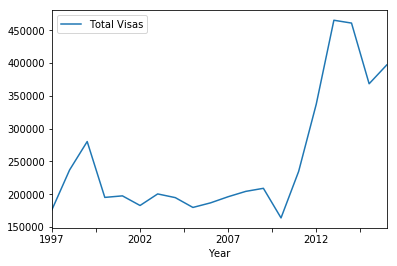

In [191]:
final_data[final_data['Country'] == 'Colombia'].plot(by='Total Visa', x='Year', y='Total Visas')

## How about Iraq?

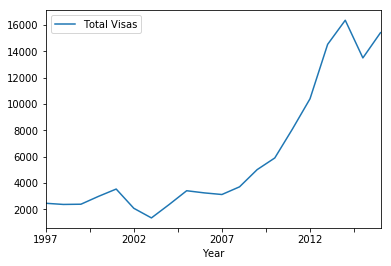

In [192]:
final_data[final_data['Country'] == 'Iraq'].plot(by='Total Visa', x='Year', y='Total Visas')

## Mexico?

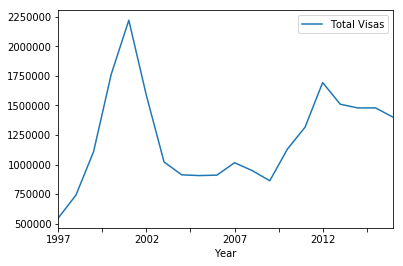

In [193]:
final_data[final_data['Country'] == 'Mexico'].plot(by='Total Visa', x='Year', y='Total Visas')